In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


<ipython-input-4-46624c53523e>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


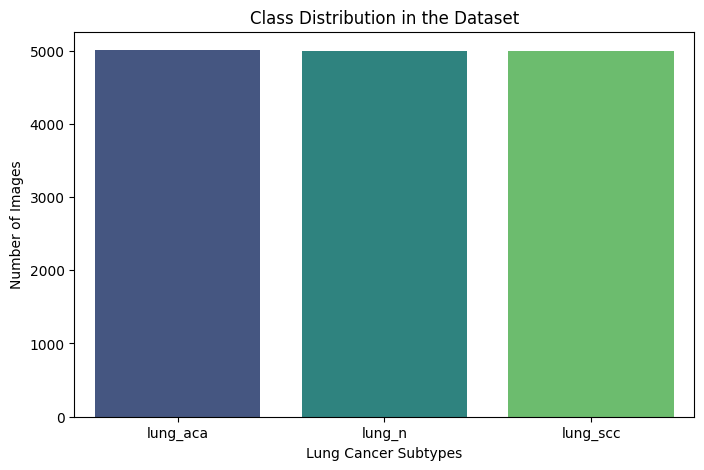

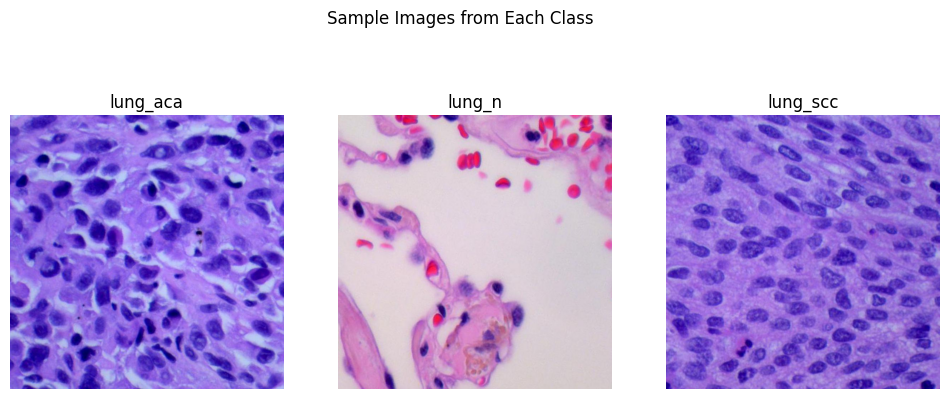

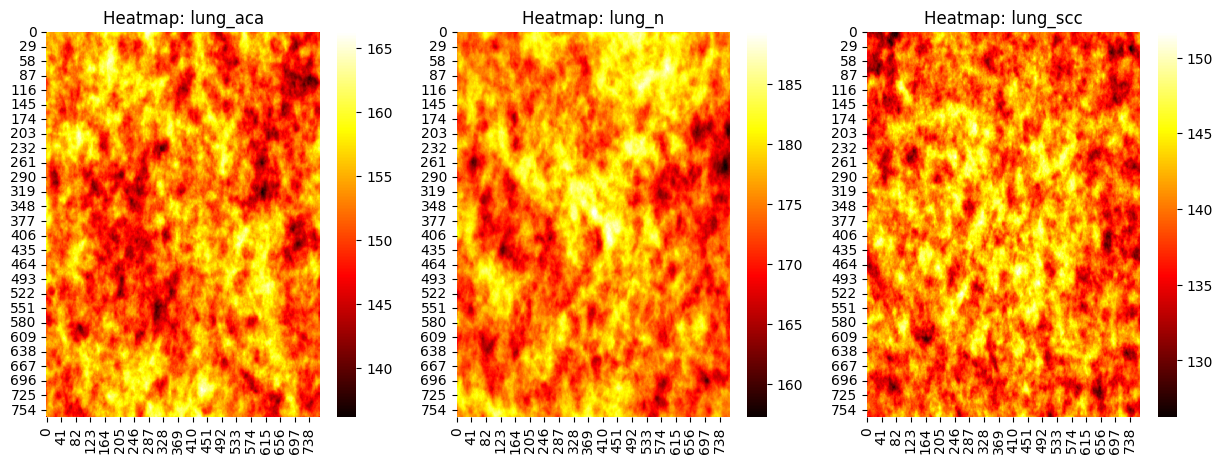

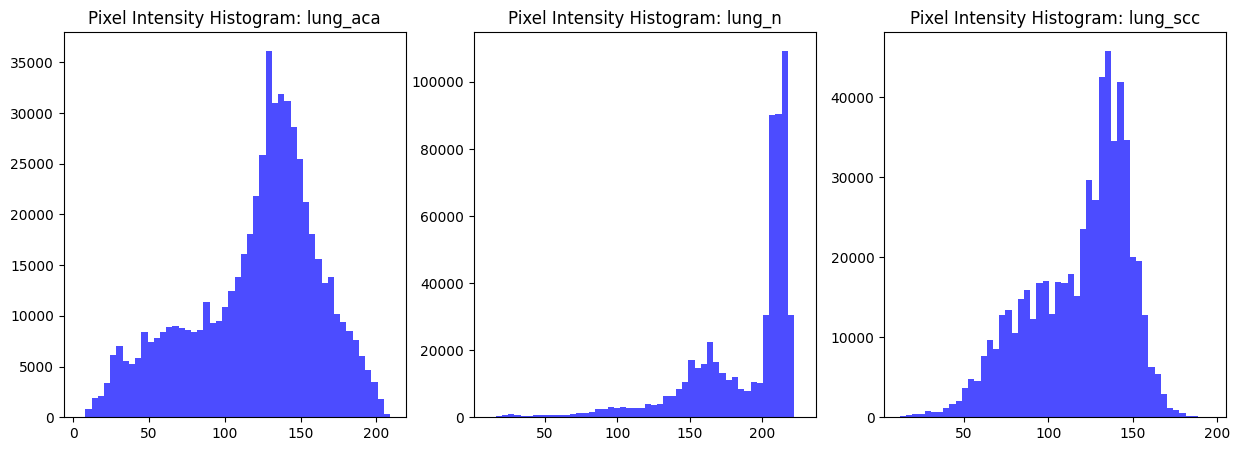

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf

# 🔐 Set seed for reproducibility
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)




# Define paths to the dataset
base_path = "/content/drive/MyDrive/lung_image_sets"
classes = ["lung_aca", "lung_n", "lung_scc"]

# Count number of images in each class
class_counts = {cls: len(os.listdir(os.path.join(base_path, cls))) for cls in classes}

# --- 1. Class Distribution Bar Plot ---
plt.figure(figsize=(8, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title("Class Distribution in the Dataset")
plt.xlabel("Lung Cancer Subtypes")
plt.ylabel("Number of Images")
plt.show()

# --- 2. Display Sample Images ---
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
for i, cls in enumerate(classes):
    img_path = os.path.join(base_path, cls, os.listdir(os.path.join(base_path, cls))[0])
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].set_title(cls)
    axes[i].axis("off")

plt.suptitle("Sample Images from Each Class")
plt.show()

# --- 3. Heatmap of Average Image Intensity ---
avg_images = {}
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, cls in enumerate(classes):
    img_paths = [os.path.join(base_path, cls, img) for img in os.listdir(os.path.join(base_path, cls))[:100]]  # Limit to 100 images
    images = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in img_paths]
    avg_image = np.mean(images, axis=0)
    avg_images[cls] = avg_image

    sns.heatmap(avg_image, cmap="hot", ax=axes[i])
    axes[i].set_title(f"Heatmap: {cls}")

plt.show()

# --- 4. Histogram Analysis of Pixel Intensity ---
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, cls in enumerate(classes):
    img_path = os.path.join(base_path, cls, os.listdir(os.path.join(base_path, cls))[0])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    axes[i].hist(img.ravel(), bins=50, color="blue", alpha=0.7)
    axes[i].set_title(f"Pixel Intensity Histogram: {cls}")

plt.show()




In [ ]:
import os

# Define dataset paths
base_dir = "/content/drive/MyDrive/Lung_Cancer_Split"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Function to count images per class in a directory
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count images in train, val, and test sets
train_counts = count_images(train_dir)
val_counts = count_images(val_dir)
test_counts = count_images(test_dir)

# Print dataset description
print("Dataset Description:")
print(f"Total Training Images: {sum(train_counts.values())}, Class Distribution: {train_counts}")
print(f"Total Validation Images: {sum(val_counts.values())}, Class Distribution: {val_counts}")
print(f"Total Test Images: {sum(test_counts.values())}, Class Distribution: {test_counts}")


Dataset Description:
Total Training Images: 12008, Class Distribution: {'lung_aca': 4008, 'lung_n': 4000, 'lung_scc': 4000}
Total Validation Images: 1501, Class Distribution: {'lung_aca': 501, 'lung_n': 500, 'lung_scc': 500}
Total Test Images: 1501, Class Distribution: {'lung_aca': 501, 'lung_n': 500, 'lung_scc': 500}


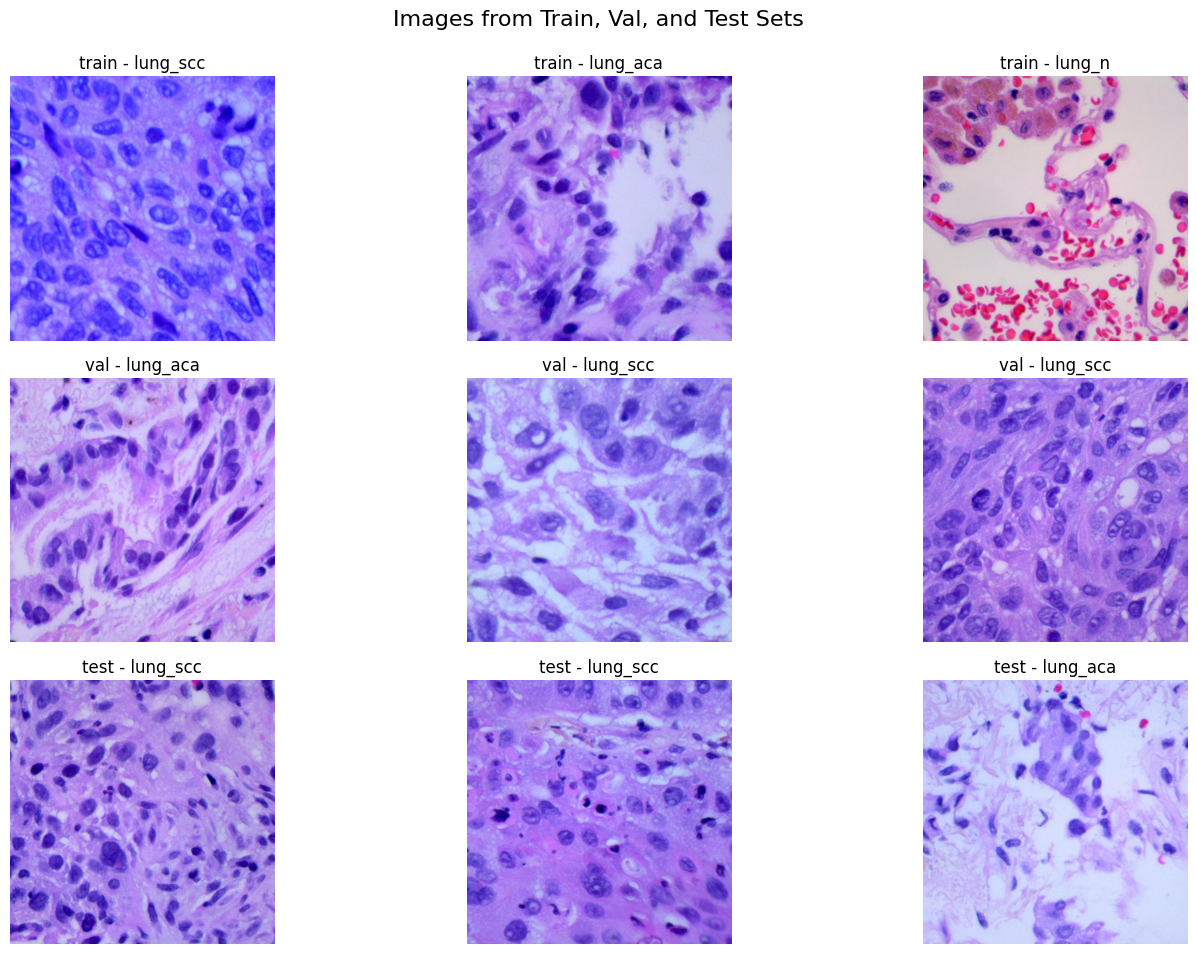

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
import random

# Assuming your image data is in the 'base_path' directory as defined previously
base_path = "/content/drive/MyDrive/Lung_Cancer_Split"  # Your base path
sets = ["train", "val", "test"]  # The sets you want to display

# Number of images to display per set
num_images_per_set = 3

# Create a figure and subplots
fig, axes = plt.subplots(len(sets), num_images_per_set, figsize=(15, 10))

# Iterate through each set
for i, set_name in enumerate(sets):
    set_path = os.path.join(base_path, set_name)  # Path to the current set
    class_folders = os.listdir(set_path)

    # Randomly select images from different classes within the set
    selected_images = []
    for _ in range(num_images_per_set):
        random_class = random.choice(class_folders)
        class_path = os.path.join(set_path, random_class)
        image_files = os.listdir(class_path)

        if image_files:  # Check if the class folder has images
            random_image = random.choice(image_files)
            img_path = os.path.join(class_path, random_image)
            selected_images.append(img_path)

    # Display the selected images
    for j, img_path in enumerate(selected_images):
        img = cv2.imread(img_path)

        if img is not None:  # Check if image loaded successfully
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            axes[i, j].imshow(img)
            axes[i, j].set_title(f"{set_name} - {os.path.basename(os.path.dirname(img_path))}")
            axes[i, j].axis("off")  # Turn off axis labels
        else:
            print(f"Failed to load image: {img_path}")  # Print error message if image loading fails

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlapping titles
plt.suptitle("Images from Train, Val, and Test Sets", fontsize=16)
plt.show()

# Data Augmentation

In [ ]:
base_dir = "/content/drive/MyDrive/Lung_Cancer_Split"
train_dir = os.path.join(base_dir, "train")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Image augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation & Test sets should only be rescaled (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
# Use os.path.join to create complete paths
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, "train"),  # Use complete path
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, "val"),  # Use complete path
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    os.path.join(base_dir, "test"),  # Use complete path
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # No shuffling for test set (important for evaluation)
)

# Print class indices
print("Class labels:", train_generator.class_indices)

Found 12008 images belonging to 3 classes.
Found 1501 images belonging to 3 classes.
Found 1501 images belonging to 3 classes.
Class labels: {'lung_aca': 0, 'lung_n': 1, 'lung_scc': 2}


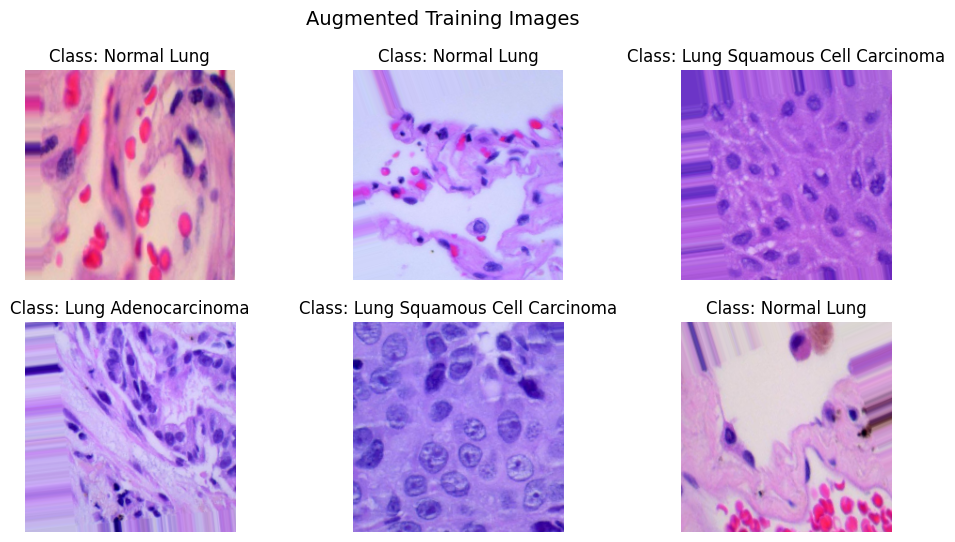

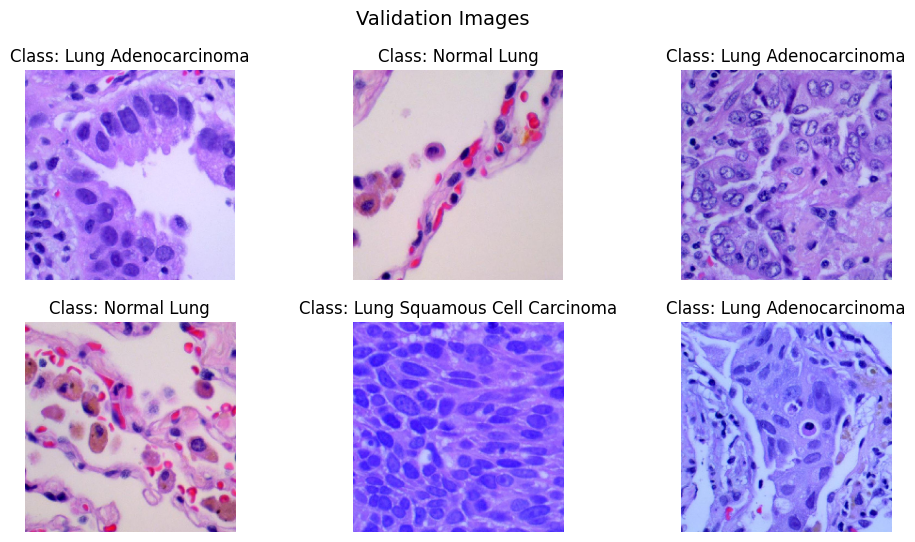

In [ ]:
# Class label mapping
class_labels = {0: "Lung Adenocarcinoma", 1: "Normal Lung", 2: "Lung Squamous Cell Carcinoma"}

# Updated function to display images with proper labels
def plot_images(generator, title, num_images=6):
    images, labels = next(generator)  # Get a batch of images
    plt.figure(figsize=(12, 6))

    for i in range(num_images):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i])
        plt.axis('off')
        class_index = np.argmax(labels[i])  # Get class index
        plt.title(f"Class: {class_labels[class_index]}")  # Map to actual class name

    plt.suptitle(title, fontsize=14)
    plt.show()

# Visualize training images with correct labels
plot_images(train_generator, "Augmented Training Images")
plot_images(val_generator, "Validation Images")


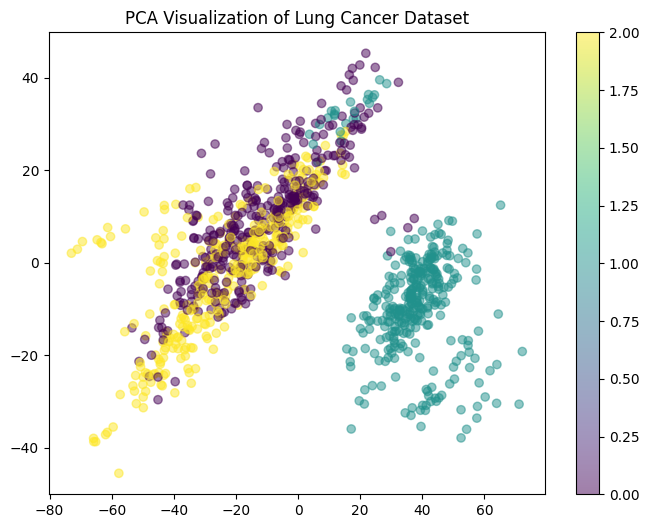

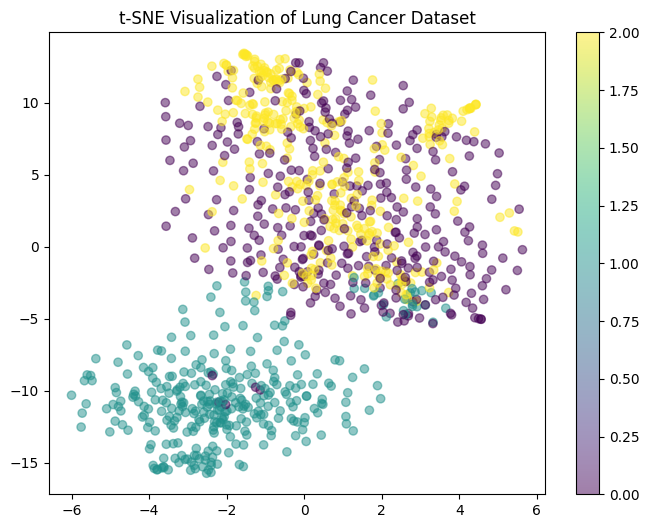

In [ ]:
# Function to extract features for PCA/t-SNE
def extract_features(generator, num_samples=1000):
    features, labels = [], []
    i = 0
    for batch_images, batch_labels in generator:
        for img, label in zip(batch_images, batch_labels):
            features.append(img.flatten())
            labels.append(np.argmax(label))
            i += 1
            if i >= num_samples:
                return np.array(features), np.array(labels)

# Extract features from training data
train_features, train_labels = extract_features(train_generator, num_samples=1000)

# PCA Visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_features)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_labels, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("PCA Visualization of Lung Cancer Dataset")
plt.show()

# Import TSNE
from sklearn.manifold import TSNE  # Import TSNE from sklearn.manifold

# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(train_features)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=train_labels, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.title("t-SNE Visualization of Lung Cancer Dataset")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import albumentations as A
from skimage.feature import graycomatrix, graycoprops
from skimage.color import rgb2gray
from skimage.io import imread
import os

# --------------------- GLCM Texture Feature Extraction --------------------- #

def extract_glcm_features(image_path):
    image = imread(image_path)
    gray = rgb2gray(image)
    gray = (gray * 255).astype(np.uint8)  # Convert to 8-bit grayscale

    # Compute GLCM matrix
    distances = [1, 2, 3]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm = graycomatrix(gray, distances=distances, angles=angles, symmetric=True, normed=True)

    # Extract texture features
    contrast = graycoprops(glcm, 'contrast').mean()
    correlation = graycoprops(glcm, 'correlation').mean()
    energy = graycoprops(glcm, 'energy').mean()
    homogeneity = graycoprops(glcm, 'homogeneity').mean()

    return {
        "Contrast": contrast,
        "Correlation": correlation,
        "Energy": energy,
        "Homogeneity": homogeneity
    }

# Example usage
sample_glcm_features = extract_glcm_features("/content/drive/MyDrive/Lung_Cancer_Split/train/lung_aca/lungaca1.jpeg" )
print("GLCM Texture Features:", sample_glcm_features)

GLCM Texture Features: {'Contrast': np.float64(39.61295305314395), 'Correlation': np.float64(0.9815487338613825), 'Energy': np.float64(0.027664706569033626), 'Homogeneity': np.float64(0.27171062985538236)}


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall

# Build the model
baseline_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

# Compile the model
baseline_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

# Callbacks
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('baseline_model.h5', save_best_only=True)

# Train the model
history = baseline_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[early_stop, checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7944 - loss: 0.8223 - precision: 0.7993 - recall: 0.7863

376/376 ━━━━━━━━━━━━━━━━━━━━ 3322s 9s/step - accuracy: 0.7945 - loss: 0.8214 - precision: 0.7994 - recall: 0.7864 - val_accuracy: 0.4817 - val_loss: 5.6314 - val_precision: 0.4815 - val_recall: 0.4777
Epoch 2/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.8808 - loss: 0.3070 - precision: 0.8834 - recall: 0.8717

376/376 ━━━━━━━━━━━━━━━━━━━━ 214s 569ms/step - accuracy: 0.8808 - loss: 0.3070 - precision: 0.8834 - recall: 0.8717 - val_accuracy: 0.9260 - val_loss: 0.1756 - val_precision: 0.9260 - val_recall: 0.9260
Epoch 3/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 208s 554ms/step - accuracy: 0.9011 - loss: 0.2643 - precision: 0.9031 - recall: 0.8945 - val_accuracy: 0.9227 - val_loss: 0.1887 - val_precision: 0.9227 - val_recall: 0.9227
Epoch 4/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.9098 - loss: 0.2427 - precision: 0.9119 - recall: 0.9047

376/376 ━━━━━━━━━━━━━━━━━━━━ 208s 553ms/step - accuracy: 0.9098 - loss: 0.2427 - precision: 0.9119 - recall: 0.9047 - val_accuracy: 0.9294 - val_loss: 0.1573 - val_precision: 0.9294 - val_recall: 0.9294
Epoch 5/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 211s 560ms/step - accuracy: 0.9139 - loss: 0.2207 - precision: 0.9156 - recall: 0.9081 - val_accuracy: 0.9227 - val_loss: 0.1889 - val_precision: 0.9227 - val_recall: 0.9227
Epoch 6/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.9214 - loss: 0.2152 - precision: 0.9229 - recall: 0.9136

376/376 ━━━━━━━━━━━━━━━━━━━━ 220s 585ms/step - accuracy: 0.9214 - loss: 0.2152 - precision: 0.9229 - recall: 0.9136 - val_accuracy: 0.9547 - val_loss: 0.1233 - val_precision: 0.9547 - val_recall: 0.9547
Epoch 7/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 209s 555ms/step - accuracy: 0.9256 - loss: 0.1998 - precision: 0.9270 - recall: 0.9210 - val_accuracy: 0.9394 - val_loss: 0.1434 - val_precision: 0.9394 - val_recall: 0.9394
Epoch 8/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.9206 - loss: 0.2092 - precision: 0.9227 - recall: 0.9168

376/376 ━━━━━━━━━━━━━━━━━━━━ 211s 560ms/step - accuracy: 0.9206 - loss: 0.2092 - precision: 0.9228 - recall: 0.9168 - val_accuracy: 0.9587 - val_loss: 0.1065 - val_precision: 0.9587 - val_recall: 0.9587
Epoch 9/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.9344 - loss: 0.1834 - precision: 0.9352 - recall: 0.9316

376/376 ━━━━━━━━━━━━━━━━━━━━ 264s 567ms/step - accuracy: 0.9344 - loss: 0.1834 - precision: 0.9352 - recall: 0.9316 - val_accuracy: 0.9620 - val_loss: 0.0962 - val_precision: 0.9620 - val_recall: 0.9614
Epoch 10/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 215s 570ms/step - accuracy: 0.9245 - loss: 0.2129 - precision: 0.9260 - recall: 0.9190 - val_accuracy: 0.9547 - val_loss: 0.1048 - val_precision: 0.9547 - val_recall: 0.9547
Epoch 11/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 208s 554ms/step - accuracy: 0.9364 - loss: 0.1758 - precision: 0.9369 - recall: 0.9342 - val_accuracy: 0.9514 - val_loss: 0.1062 - val_precision: 0.9520 - val_recall: 0.9514
Epoch 12/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 208s 554ms/step - accuracy: 0.9304 - loss: 0.2055 - precision: 0.9310 - recall: 0.9272 - val_accuracy: 0.9221 - val_loss: 0.2039 - val_precision: 0.9221 - val_recall: 0.9221
Epoch 13/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 216s 575ms/step - accuracy: 0.9341 - loss: 0.1815 - precision: 0.9352 - recall: 0.9314 - val_accuracy: 0.9407 -

376/376 ━━━━━━━━━━━━━━━━━━━━ 210s 560ms/step - accuracy: 0.9413 - loss: 0.1665 - precision: 0.9421 - recall: 0.9377 - val_accuracy: 0.9607 - val_loss: 0.0942 - val_precision: 0.9607 - val_recall: 0.9607
Epoch 15/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 213s 567ms/step - accuracy: 0.9376 - loss: 0.1677 - precision: 0.9388 - recall: 0.9340 - val_accuracy: 0.9494 - val_loss: 0.1151 - val_precision: 0.9494 - val_recall: 0.9494
Epoch 16/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.9430 - loss: 0.1622 - precision: 0.9437 - recall: 0.9395

376/376 ━━━━━━━━━━━━━━━━━━━━ 212s 563ms/step - accuracy: 0.9430 - loss: 0.1622 - precision: 0.9437 - recall: 0.9395 - val_accuracy: 0.9674 - val_loss: 0.0911 - val_precision: 0.9674 - val_recall: 0.9674
Epoch 17/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.9412 - loss: 0.1611 - precision: 0.9415 - recall: 0.9378

376/376 ━━━━━━━━━━━━━━━━━━━━ 216s 573ms/step - accuracy: 0.9412 - loss: 0.1610 - precision: 0.9415 - recall: 0.9378 - val_accuracy: 0.9594 - val_loss: 0.0896 - val_precision: 0.9594 - val_recall: 0.9594
Epoch 18/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.9444 - loss: 0.1426 - precision: 0.9453 - recall: 0.9420

376/376 ━━━━━━━━━━━━━━━━━━━━ 219s 581ms/step - accuracy: 0.9444 - loss: 0.1426 - precision: 0.9453 - recall: 0.9420 - val_accuracy: 0.9654 - val_loss: 0.0835 - val_precision: 0.9654 - val_recall: 0.9654
Epoch 19/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.9520 - loss: 0.1274 - precision: 0.9536 - recall: 0.9507

376/376 ━━━━━━━━━━━━━━━━━━━━ 212s 563ms/step - accuracy: 0.9520 - loss: 0.1274 - precision: 0.9536 - recall: 0.9507 - val_accuracy: 0.9680 - val_loss: 0.0729 - val_precision: 0.9680 - val_recall: 0.9680
Epoch 20/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 259s 555ms/step - accuracy: 0.9441 - loss: 0.1484 - precision: 0.9451 - recall: 0.9434 - val_accuracy: 0.9640 - val_loss: 0.0853 - val_precision: 0.9640 - val_recall: 0.9640
Epoch 21/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 212s 563ms/step - accuracy: 0.9462 - loss: 0.1480 - precision: 0.9465 - recall: 0.9451 - val_accuracy: 0.9627 - val_loss: 0.0836 - val_precision: 0.9627 - val_recall: 0.9627
Epoch 22/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 212s 563ms/step - accuracy: 0.9514 - loss: 0.1381 - precision: 0.9525 - recall: 0.9498 - val_accuracy: 0.9607 - val_loss: 0.0832 - val_precision: 0.9607 - val_recall: 0.9607
Epoch 23/25
376/376 ━━━━━━━━━━━━━━━━━━━━ 211s 561ms/step - accuracy: 0.9482 - loss: 0.1528 - precision: 0.9483 - recall: 0.9467 - val_accuracy: 0.9487 -

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp baseline_model.h5 /content/drive/MyDrive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp baseline_model.h5 /content/drive/MyDrive/


In [ ]:
import tensorflow as tf

print("GPU Available:", tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available: True


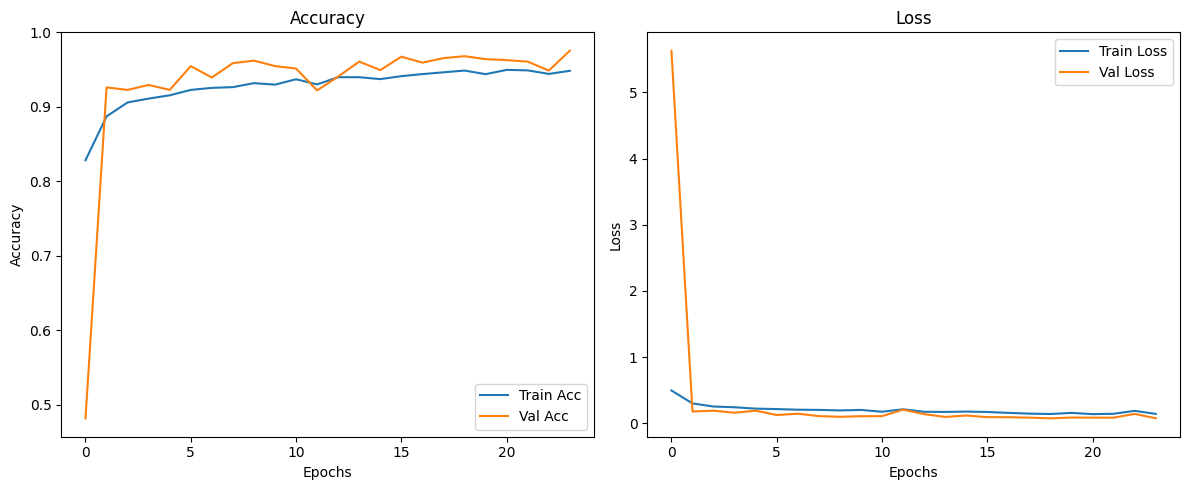

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate on test data
test_loss, test_acc, test_prec, test_rec = baseline_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Precision: {test_prec:.4f}")
print(f"Test Recall: {test_rec:.4f}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 432s 9s/step - accuracy: 0.9761 - loss: 0.0794 - precision: 0.9761 - recall: 0.9761
Test Accuracy: 0.9740
Test Precision: 0.9740
Test Recall: 0.9740


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Get the class labels
class_names = list(test_generator.class_indices.keys())

# Predict probabilities
predictions = baseline_model.predict(test_generator)

# Convert probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_generator.classes


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step


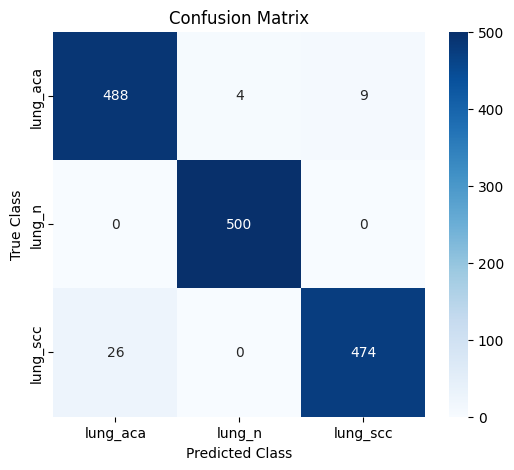

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


In [ ]:
# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_names))


              precision    recall  f1-score   support

    lung_aca       0.95      0.97      0.96       501
      lung_n       0.99      1.00      1.00       500
    lung_scc       0.98      0.95      0.96       500

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

